In [47]:
import numpy as np
import pandas as pd

df = pd.read_csv('/Users/michael/Desktop/VSC/SalaryPrediction/data_science_salaries.csv')

In [48]:
df.dtypes

job_title             object
experience_level      object
employment_type       object
work_models           object
work_year              int64
employee_residence    object
salary                 int64
salary_currency       object
salary_in_usd          int64
company_location      object
company_size          object
dtype: object

In [49]:
df.isnull().sum()

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64

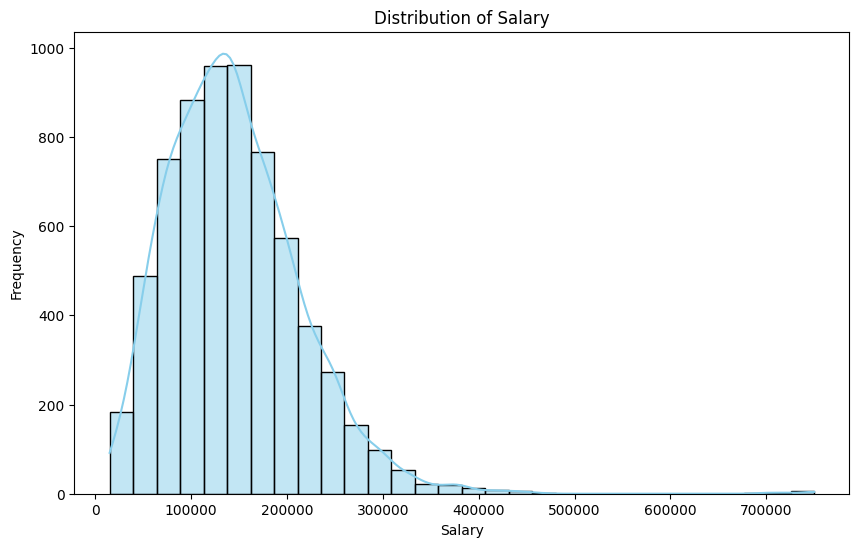

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

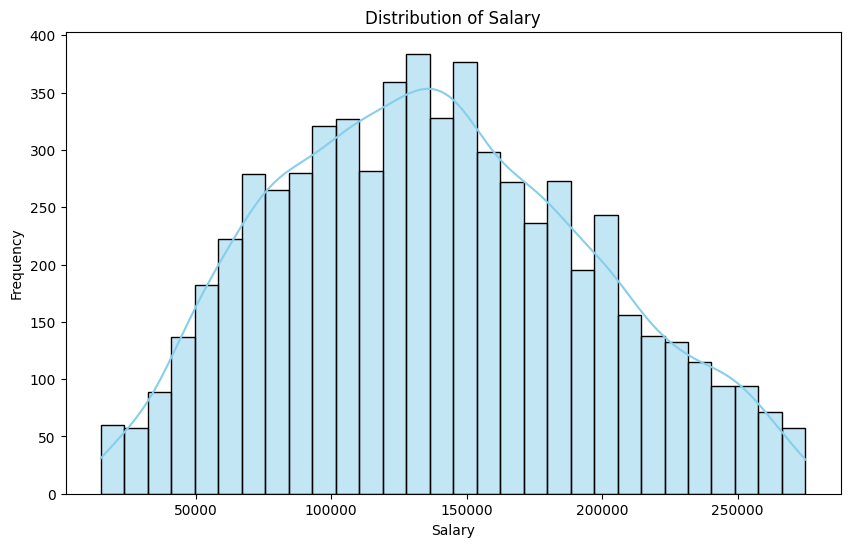

In [51]:
df = df[df['salary_in_usd'] <= 275000]

plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


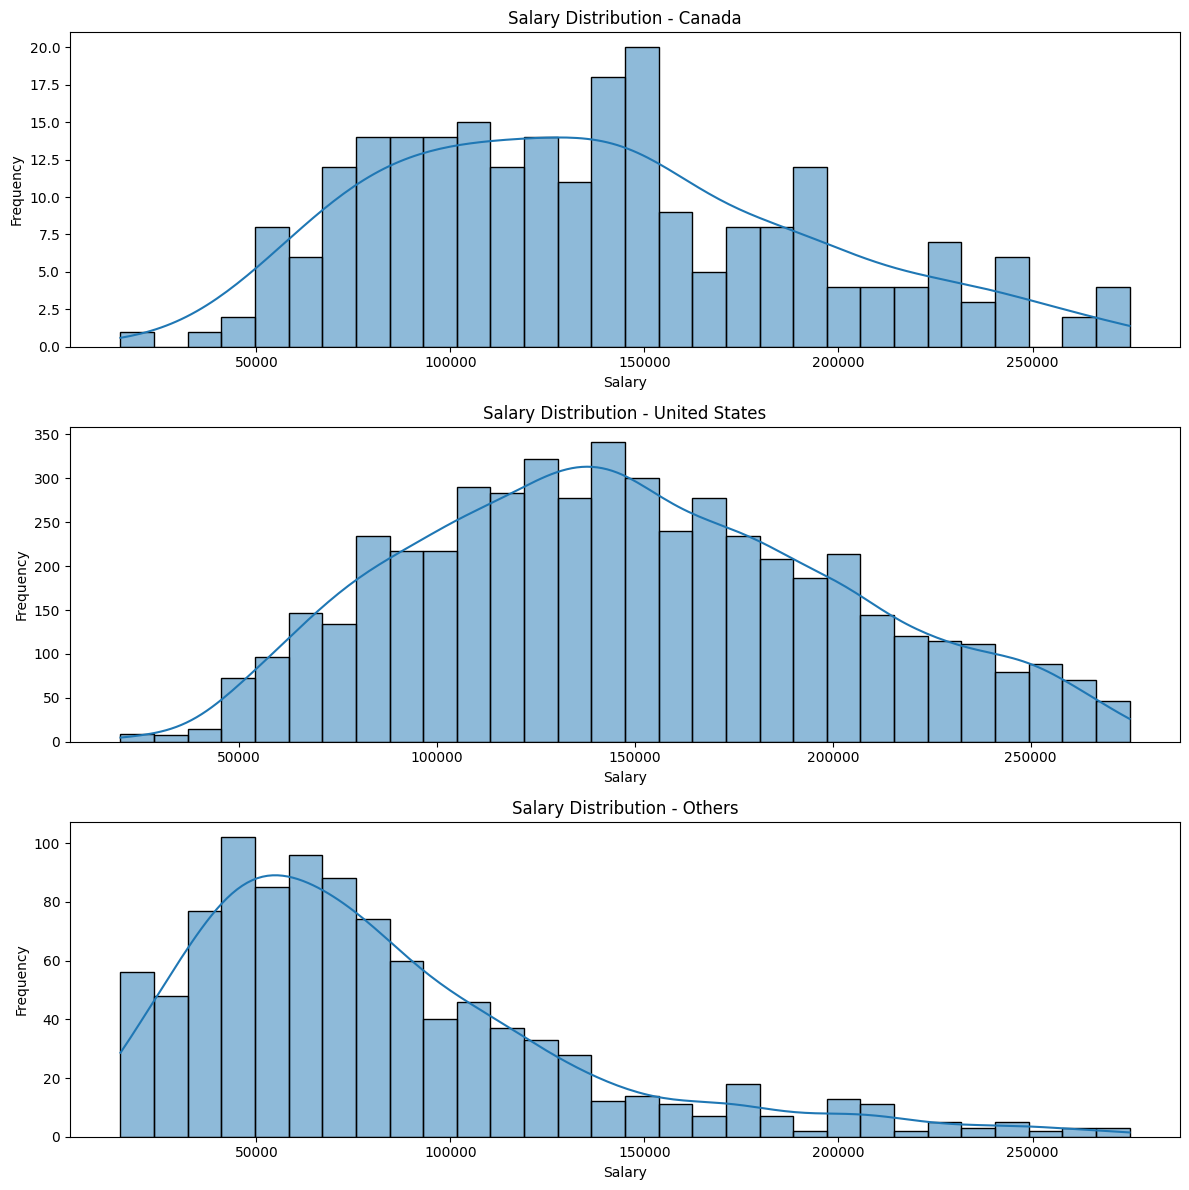

In [52]:
countries_to_keep = ['Canada', 'United States']

# Create a new column 'grouped_country'
df['company_location'] = df['company_location'].apply(lambda x: x if x in countries_to_keep else 'Others')

# Create separate histogram plots for each grouped country
fig, axes = plt.subplots(nrows=len(countries_to_keep) + 1, figsize=(12, 4 * (len(countries_to_keep) + 1)))

for i, group in enumerate(['Canada', 'United States', 'Others']):
    sns.histplot(df[df['company_location'] == group]['salary_in_usd'], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Salary Distribution - {group}')
    axes[i].set_xlabel('Salary')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [53]:
len(df)

6323

In [54]:
df.dtypes

job_title             object
experience_level      object
employment_type       object
work_models           object
work_year              int64
employee_residence    object
salary                 int64
salary_currency       object
salary_in_usd          int64
company_location      object
company_size          object
dtype: object

In [55]:
columns_not_needed = ['salary', 'salary_currency', 'employee_residence' , 'work_year','company_size']
df = df.drop(columns=columns_not_needed)

In [56]:
country_counts = df.company_location.value_counts()
country_counts

company_location
United States    5097
Others            988
Canada            238
Name: count, dtype: int64

In [57]:
# Group by country and calculate the minimum and maximum salary for each group
country_salary_stats = df.groupby('company_location')['salary_in_usd'].agg(['min', 'max']).reset_index()

# Print the result
print(country_salary_stats)

  company_location    min     max
0           Canada  15000  275000
1           Others  15000  275000
2    United States  20000  275000


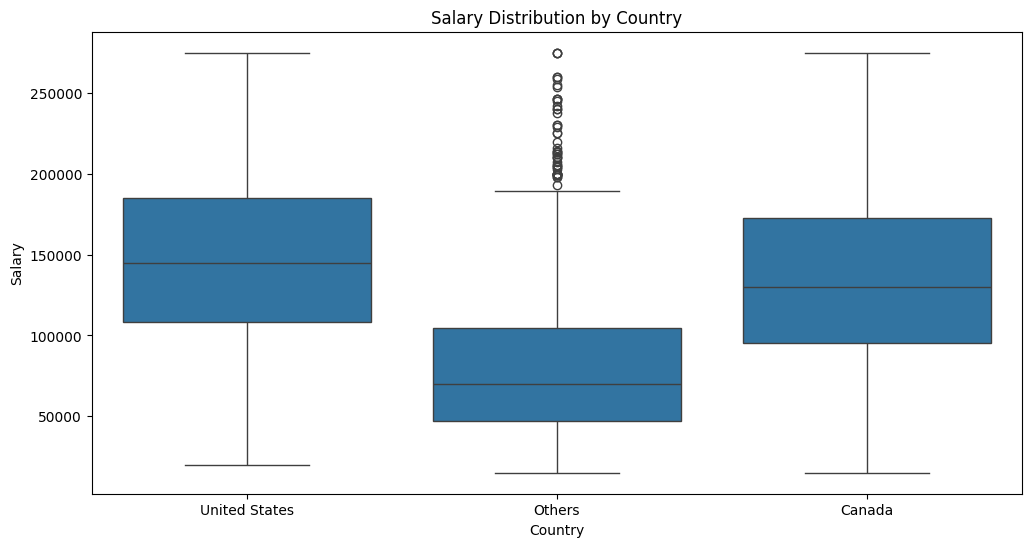

In [58]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='company_location', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.show()

In [59]:
features = ['job_title','experience_level','employment_type', 'work_models', 'company_location']
X = df[features]
y = df['salary_in_usd']
X = X.dropna()

In [60]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

                                   
X_train = X_train[features].copy()
X_test = X_test[features].copy()
X = X[features].copy()

# Define the preprocessing pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, features)
    ])

In [61]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the transformed training data
model.fit(X_train_transformed, y_train)

# Make predictions on the transformed test data
pred = model.predict(X_test_transformed)

In [62]:
from sklearn.metrics import mean_absolute_error


mae = mean_absolute_error(y_test, pred)

print(f'MAE for LinearRegression: {mae}')

MAE for LinearRegression: 36471.660841539895


In [63]:
import pickle
with open('predict_model.pkl', 'wb') as file:
    pickle.dump(model, file)